In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import TweedieRegressor

from env import host, user, password
import wrangle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Wrangle

In [3]:
# comment out viz before putting in report
train, validate, test = wrangle.wrangle_zillow()

In [4]:
train.shape, validate.shape, test.shape

((24858, 6), (10654, 6), (8879, 6))

In [5]:
train.head()

num_beds  num_baths  square_footage  tax_value year_built county_code
29516       4.0        2.5          1470.0   311578.0     1978.0      6059.0
41702       4.0        2.0          1208.0   306475.0     1956.0      6059.0
4232        3.0        3.0          2063.0   124214.0     1956.0      6037.0
12495       2.0        1.0          1984.0    71410.0     1913.0      6037.0
38584       3.0        2.0          1430.0   203928.0     1950.0      6037.0

In [6]:
# Run split_tvt_into_variables / the target is tax_value
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_tvt_into_variables(train, validate, test, target='tax_value')

In [7]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.Min_Max_Scaler(X_train, X_validate, X_test)

In [9]:
X_train_scaled.head()

num_beds  num_baths  square_footage
29516  0.666667   0.500000        0.352760
41702  0.666667   0.333333        0.271970
4232   0.333333   0.666667        0.535615
12495  0.000000   0.000000        0.511255
38584  0.333333   0.333333        0.340426

In [10]:
def plot_variable_pairs(df):
    '''
    Takes in a dataframe and plots all pairwise relationships.
    '''
    sns.pairplot(df)

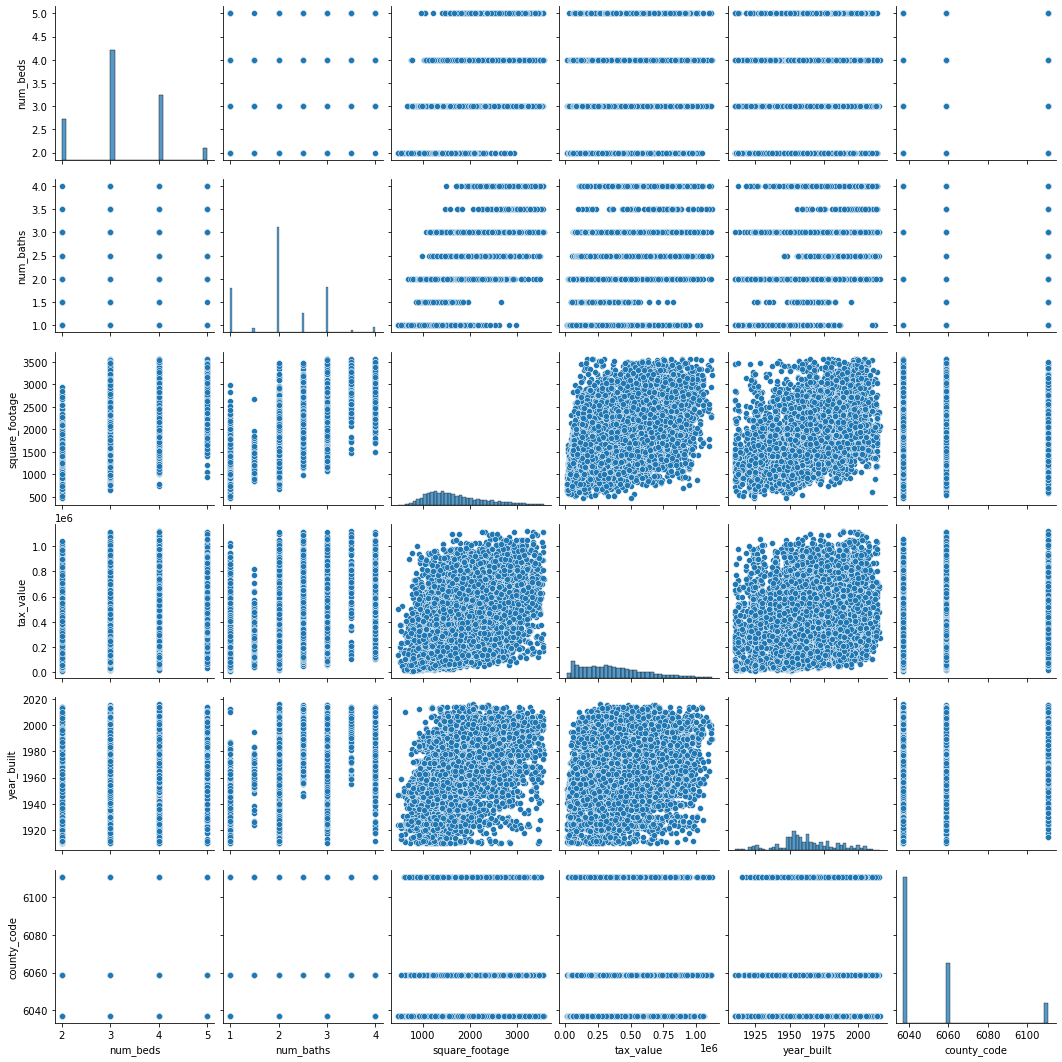

In [11]:
plot_variable_pairs(train.sample(10_000))

In [13]:
# Correlation Matrix
corr_df = pd.concat([X_train_scaled, y_train], axis=1)
corrs = corr_df.corr()
corrs

num_beds  num_baths  square_footage  tax_value
num_beds        1.000000   0.579184        0.607678   0.194477
num_baths       0.579184   1.000000        0.774739   0.359318
square_footage  0.607678   0.774739        1.000000   0.431936
tax_value       0.194477   0.359318        0.431936   1.000000

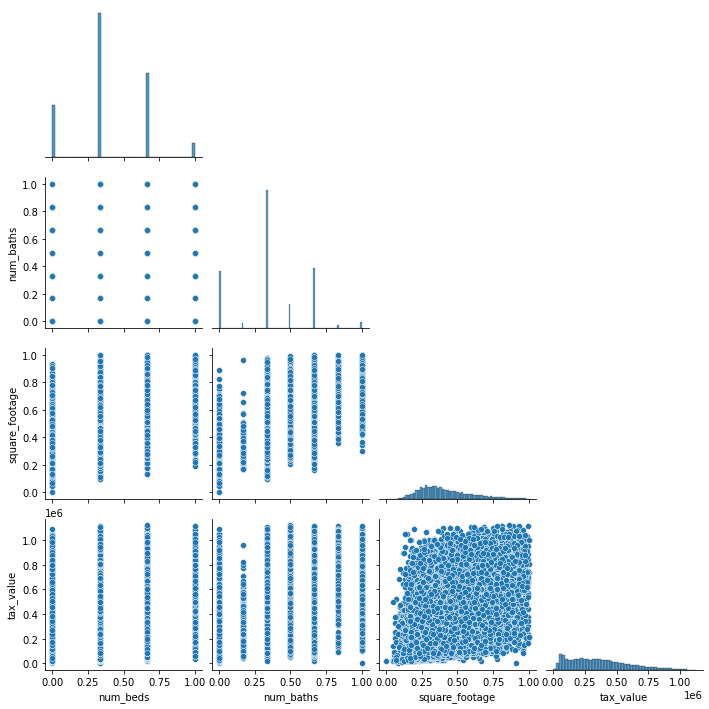

In [14]:
sns.pairplot(corr_df[['num_beds', 'num_baths', 'square_footage', 'tax_value']], corner=True)
plt.show()

In [15]:
corr_spearman = corr_df.corr(method='spearman')
corr_spearman

num_beds  num_baths  square_footage  tax_value
num_beds        1.000000   0.575273        0.619687   0.192883
num_baths       0.575273   1.000000        0.794695   0.357623
square_footage  0.619687   0.794695        1.000000   0.395469
tax_value       0.192883   0.357623        0.395469   1.000000

In [16]:
#sns.swarmplot(x=X_train_scaled['num_beds'], y=y_train, data=train)
#plt.show()

In [24]:
def plot_categorical_and_continuous_vars1(df, continuous, categorical):
    '''
    Takes in a dataframe, a list of continuous variables and a list of categorical 
    variables of the dataframe as arguments. Creates three different plots of each
    categorical pair.
    '''
    for con in continuous:
        for cat in categorical:
            plt.figure(figsize = (20,10))
            plt.subplot(1,3,1)
            sns.swarmplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,2)
            sns.stripplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,3)
            sns.boxplot(x=df[cat], y=df[con], data=df)

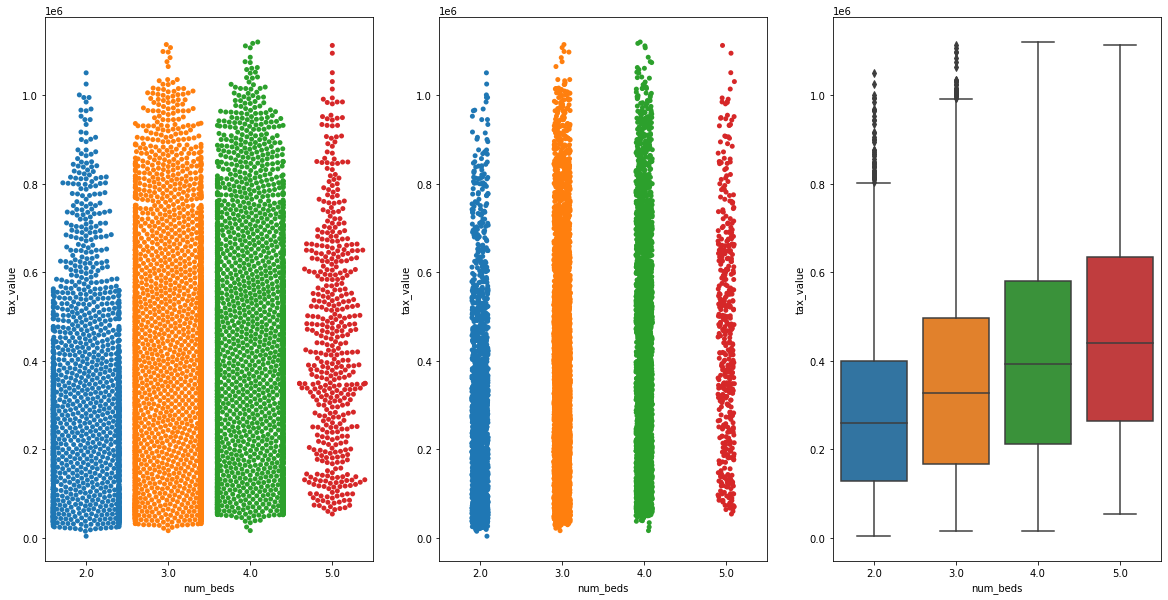

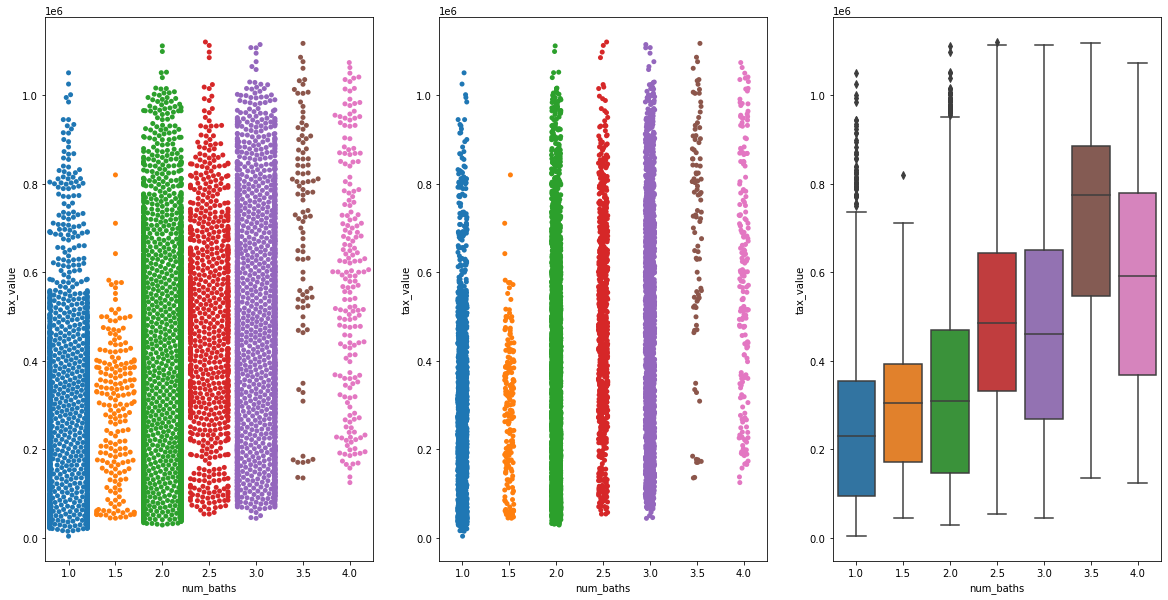

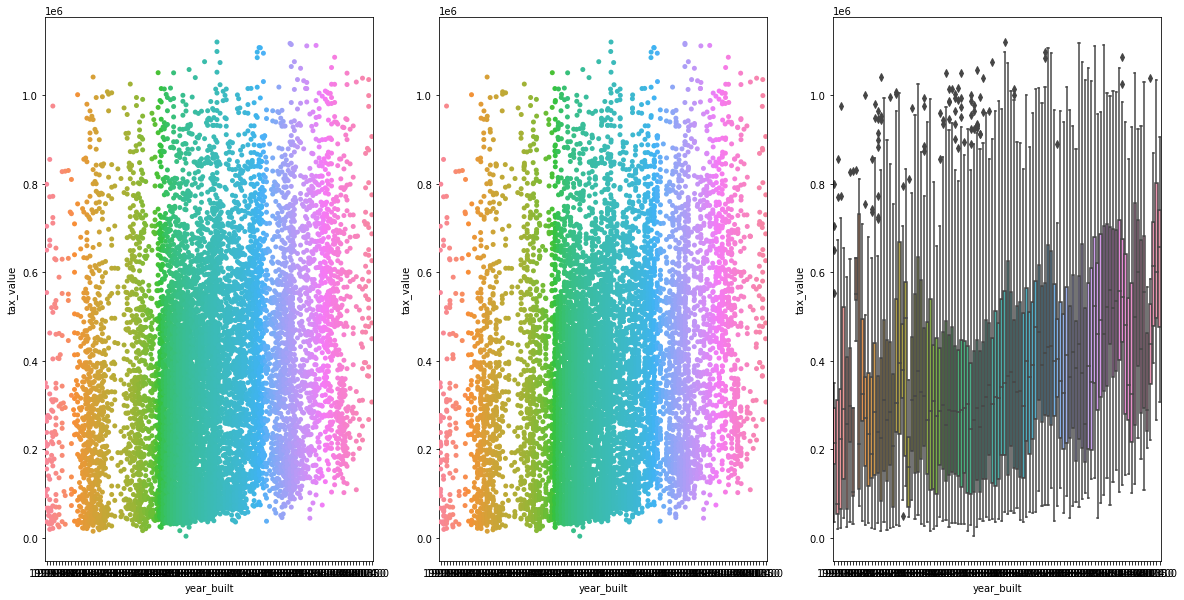

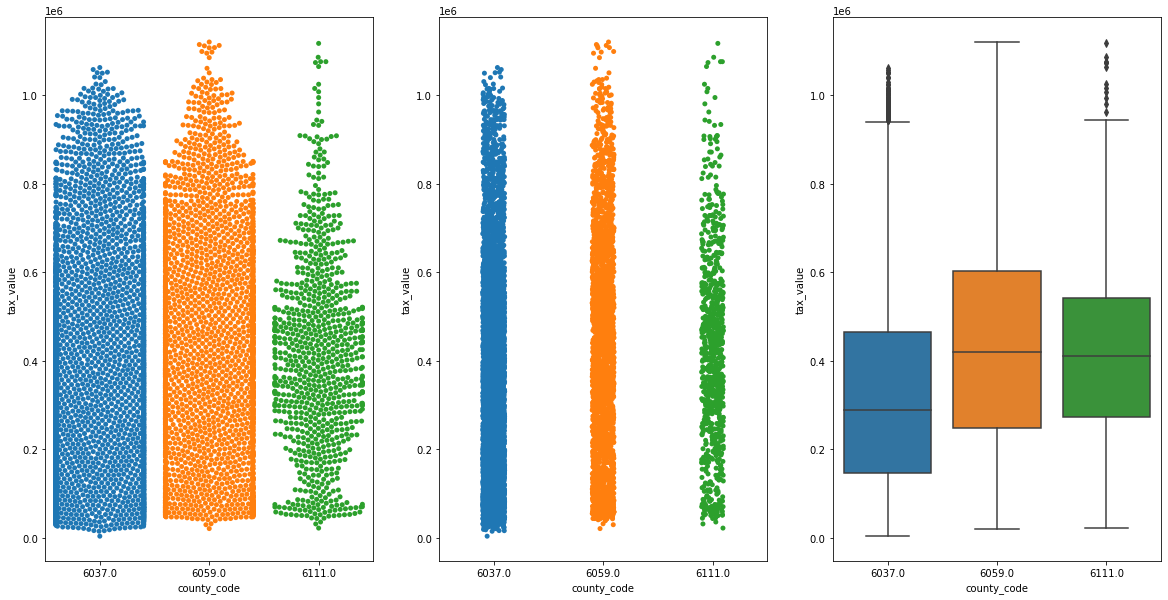

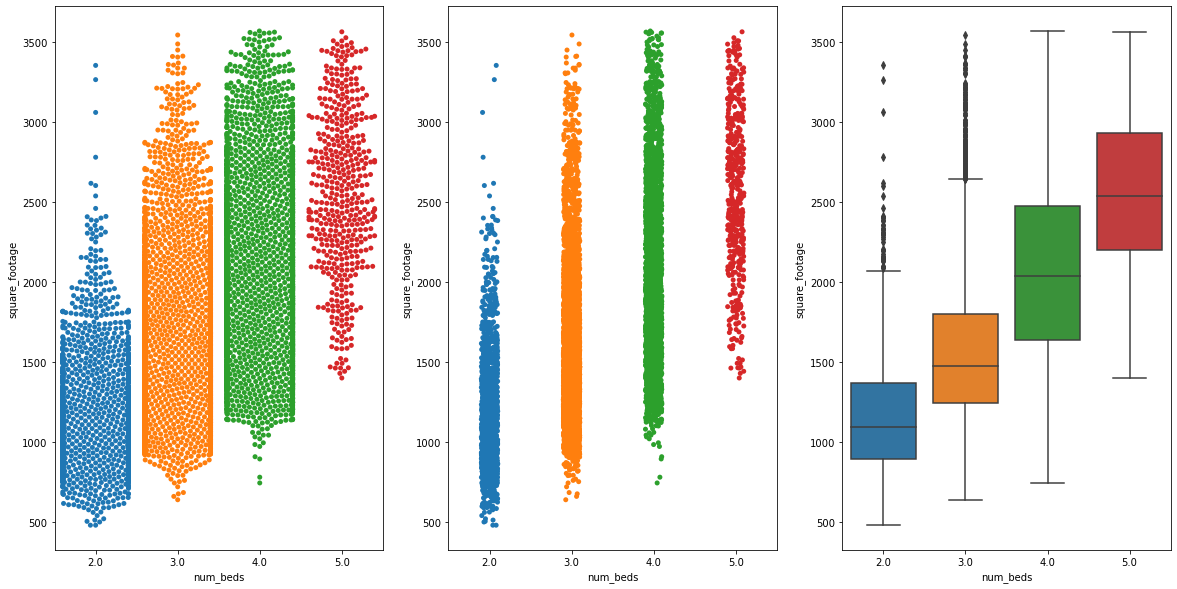

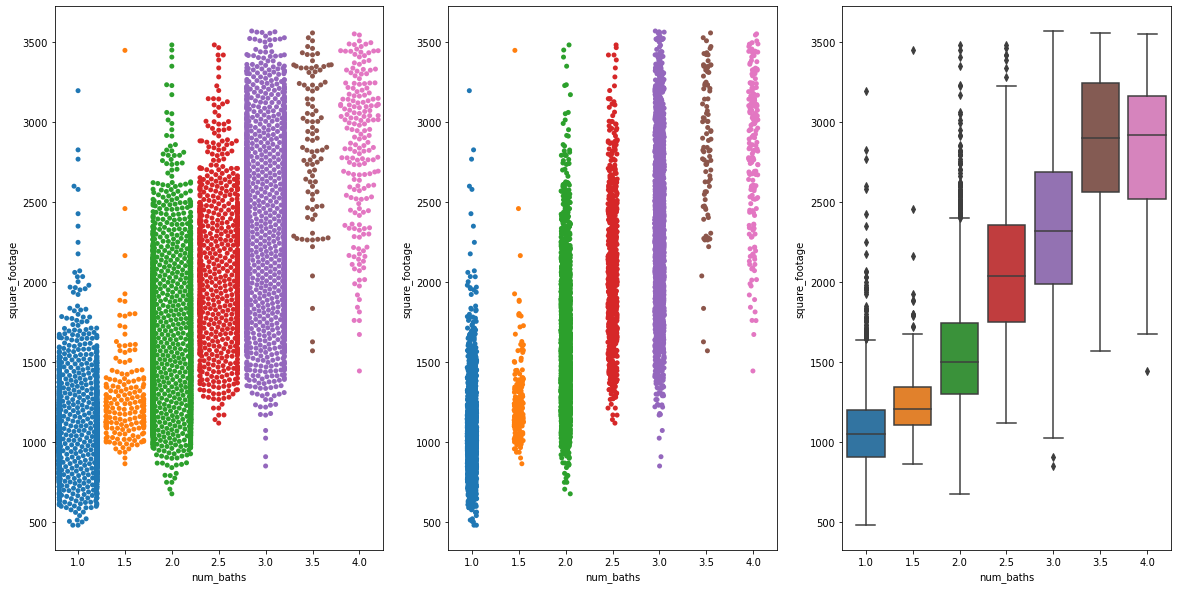

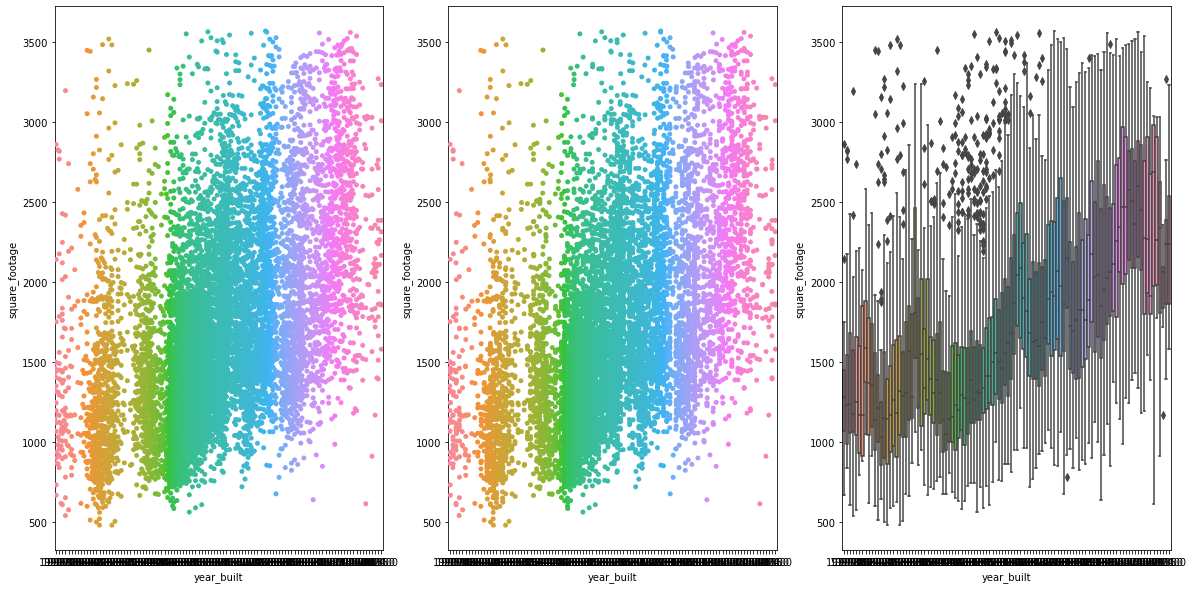

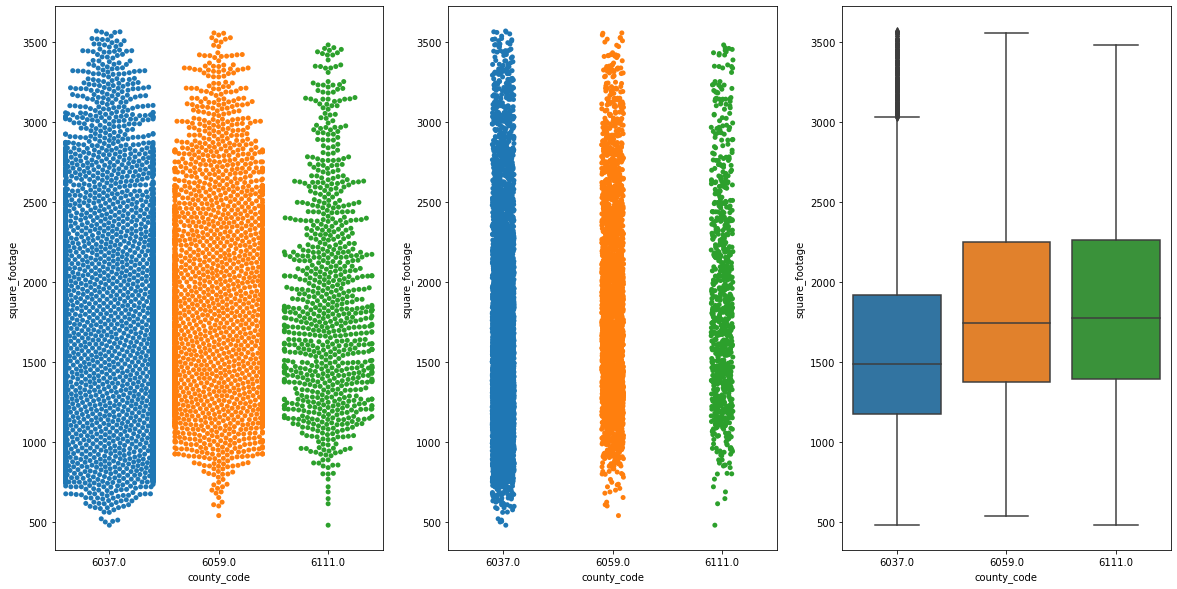

In [25]:
zillow_con = ['tax_value','square_footage']
zillow_cat= ['num_beds','num_baths','year_built','county_code']

plot_categorical_and_continuous_vars1(train.sample(10_000), zillow_con, zillow_cat)

In [19]:
# 6037	Los Angeles	CA
# 6059	Orange	CA
# 6111	Ventura	CA


In [26]:
def plot_categorical_and_continuous_vars2(categorical_var, continuous_var, df):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    plt.suptitle(f'{continuous_var} by {categorical_var}', fontsize=18)
    
    #sns.lineplot(x=categorical_var, y=continuous_var, data=df)
    #plt.xlabel(categorical_var, fontsize=12)
    #plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind='box', palette='Greens')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="swarm", palette='Blues')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="bar", palette='Purples')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)

<Figure size 432x288 with 0 Axes>

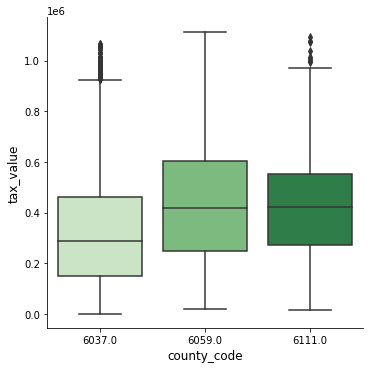

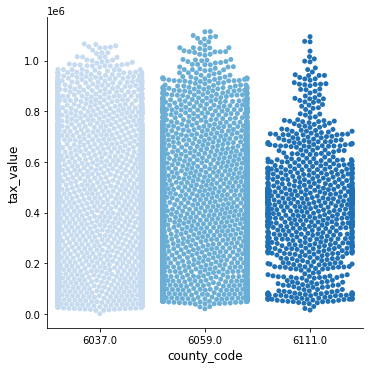

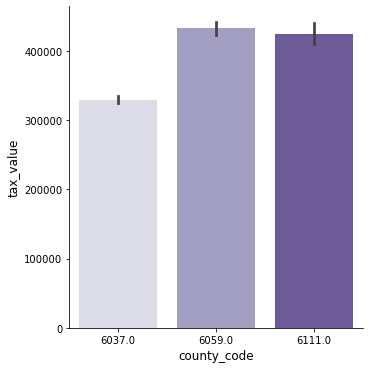

In [27]:
plot_categorical_and_continuous_vars2('county_code', 'tax_value', train.sample(10_000))

In [28]:
def square_footage_rounded(df):
    """
    Takes in a df and returns the df with new feature "round_square_footage"
    """
    df["round_square_footage"] = round(train.square_footage // 1000)
    return df

In [29]:
new_train = square_footage_rounded(train)
new_train.head()

num_beds  num_baths  square_footage  tax_value year_built county_code  \
29516       4.0        2.5          1470.0   311578.0     1978.0      6059.0   
41702       4.0        2.0          1208.0   306475.0     1956.0      6059.0   
4232        3.0        3.0          2063.0   124214.0     1956.0      6037.0   
12495       2.0        1.0          1984.0    71410.0     1913.0      6037.0   
38584       3.0        2.0          1430.0   203928.0     1950.0      6037.0   

       round_square_footage  
29516                   1.0  
41702                   1.0  
4232                    2.0  
12495                   1.0  
38584                   1.0

In [30]:
new_train['round_square_footage'] = new_train.round_square_footage.astype('object')

In [31]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24858 entries, 29516 to 36552
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_beds              24858 non-null  float64
 1   num_baths             24858 non-null  float64
 2   square_footage        24858 non-null  float64
 3   tax_value             24858 non-null  float64
 4   year_built            24858 non-null  object 
 5   county_code           24858 non-null  object 
 6   round_square_footage  24858 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.5+ MB


<Figure size 432x288 with 0 Axes>

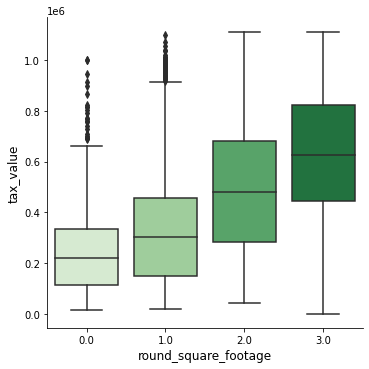

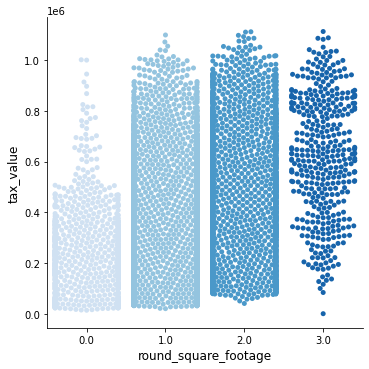

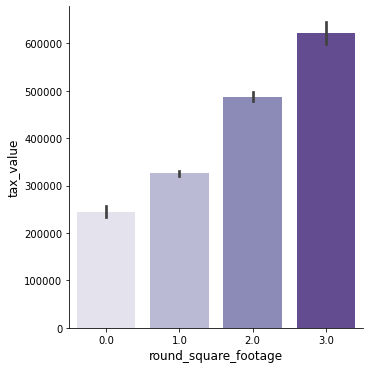

In [33]:
plot_categorical_and_continuous_vars2('round_square_footage', 'tax_value', new_train.sample(10_000))


In [34]:
def plot_categorical_and_continuous_vars3(categorical_var, continuous_var, df):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    plt.suptitle(f'{continuous_var} by {categorical_var}', fontsize=18)
    
    #sns.lineplot(x=categorical_var, y=continuous_var, data=df)
    #plt.xlabel(categorical_var, fontsize=12)
    #plt.ylabel(continuous_var, fontsize=12)
    
    #sns.catplot(x=categorical_var, y=continuous_var, data=df, kind='box', palette='Greens')
    #plt.xlabel(categorical_var, fontsize=12)
    #plt.ylabel(continuous_var, fontsize=12)
    
    #sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="swarm", palette='Blues')
    #plt.xlabel(categorical_var, fontsize=12)
    #plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="bar", palette='Purples')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)

<Figure size 432x288 with 0 Axes>

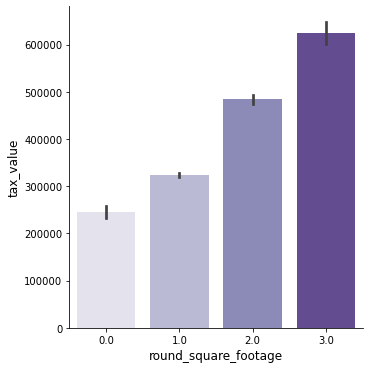

In [36]:
plot_categorical_and_continuous_vars3('round_square_footage', 'tax_value', new_train.sample(10_000))

<Figure size 432x288 with 0 Axes>

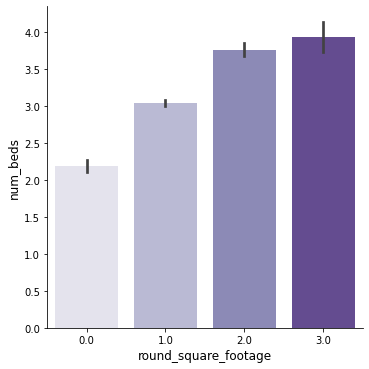

In [39]:
plot_categorical_and_continuous_vars3('round_square_footage', 'num_beds', new_train.sample(1_000))

<Figure size 432x288 with 0 Axes>

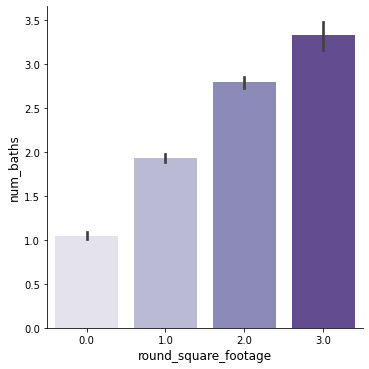

In [40]:
plot_categorical_and_continuous_vars3('round_square_footage', 'num_baths', new_train.sample(1_000))

In [41]:
# Creating a dataframe with county and tax_rate
tax_by_county = pd.DataFrame({'county':train.county_code,'tax value':train.tax_value})
tax_by_county

county  tax value
29516  6059.0   311578.0
41702  6059.0   306475.0
4232   6037.0   124214.0
12495  6037.0    71410.0
38584  6037.0   203928.0
...       ...        ...
26320  6037.0   270861.0
24932  6037.0   540045.0
28229  6037.0   449242.0
31237  6059.0    84678.0
36552  6059.0   449253.0

[24858 rows x 2 columns]

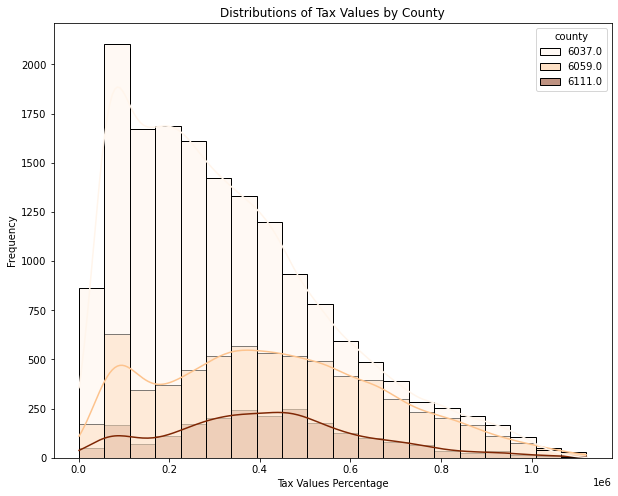

In [42]:
def value_by_county():

    plt.figure(figsize=(10,8))
    sns.histplot(data=tax_by_county, x='tax value', kde=True, hue='county', bins=20, palette='Oranges')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel('Tax Values Percentage')
    plt.ylabel('Frequency')
    plt.title('Distributions of Tax Values by County')
    plt.show()
    
value_by_county()